# CFD Results Post-Process and Validation

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). These steps require an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

This section discusses results for **2D Laminar Flow over a rotating cylinder**. The Reynolds number, based on cylinder diameter, in the presented results is 100. However, the presented general post-processing methodology is applicable to flows with different Reynolds numbers. First check point for numerical solution convergence is to visualize and check the residuals values for key flow field variables (e.g., Continuity, X-momentum, Y-momentum etc). In Fluent by default, once the user starts the simulation, the residuals for the relevant variables is visualized on the solver's console. Users can further manage visualization of additional residual values via <span style=style="background-color:lightgrey;">Solution\Monitors</span>.

<img src="./Images/residual.jpg" width="900">
Fig. 1. Residuals of Continuity and Momentum, in x- and y- directions, for simulation of flow over a rotating cylinder with Re =100 and Tip Speed Ratio ($\alpha$) = 0.

Fig. 1 visualizes the residual values for Continuity and Momentum in x- and y- directions versus number of iterations. The Residual of a variable is the difference between the present and previous iteration values. A low value of residual indicates that the obtained numerical solution of the variable is converging to a finite value. Furthermore, the spikes in the residual values shown in Fig. 1 implies the unsteady nature of the CFD simulation and increment within the flow field time span.
The decreasing trend in residual values is a necessary, but not sufficient condition for convergence of the obtained numerical solution. As a rule of thumb reaching continuity residual value of $10^-3$ confirms the convergence of numerical solution and running for further iterations would most probably lead to a converged solution. Users can set stopping criteria for different residual values using <span style=style="background-color:lightgrey;">Solution/Monitors/Residual</span>. In the current case study, residual values of $10^-6$ are set for both Continuity and Momentum.

Another important variable to obtain monotonically decreasing residual values for unsteady simulation is the choice of the marching time step within the flow field defined time span. The time step has to be estimated correctly and be small enough so that the flow field solution develops slowly and details of the flow field physics are captured correctly, while the computational time and cost requirements are minimized. For this simulation, the time step is set to $0.2$ seconds, which is one-fifth of the time scale based on flow free stream velocity ($1~\frac{m}{s}$) and diameter of the cylinder ($1~[m]$). Once the simulation starts, the residuals are plotted and checked within each time step as shown in Fig. 1 between each spike. Once the defined criteria are met at each time step, iteration will proceed to the next time step.

The second step for post-processing of a CFD-simulation is to visualize the important flow field variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice. For most of the problems, contour of normalized velocity or pressure, over a horizontal or vertical plane at the center of the CFD domain, is a good start point. However, in this problem visualization of the vorticity field would be more beneficial to understand the physics of the flow and perform further investigation on it. In order to perform this post-processing step, before even running the simulation, first the path for storing solution data at each time step should be set, since the solver by default would only save the most recent time step solution. This can be set up via <span style=style="background-color:lightgrey;">Solution/Calculation Activities/Automatic Export/Create/Solution Data Export</span>. `File Type` is changed to be **CFD-Post** (post-processing modulus of Fluent) compatible or other file desired extension formats. Variable of <span style=style="background-color:lightgrey;">Vorticity Magnitude</span> is selected to be stored at each time step.  The stored files are to be opened later inside **CFD-Post** to export vorticity contours and/or animation of flow field temporal evolution. 

<img src="./Images/vortices.png\" width = \"900\">
Fig. 2: Visualized vorticity contours for flow over rotating cylinder within the CFD Domain for case studies with different rotational velocities ($\alpha$) at Re =100. 

Fig. 2 visualizes the contours of vorticity magnitude within the CFD domain. Flow enters the domain from left to right. Due to the imposed no-slip boundary conditions over the surface of the cylinder, the velocity instantly decreases to zero on the nose of the cylinder and a laminar boundary layer starts to form and grow around the cylinder’s surface. Moving slightly further downstream at the top and bottom edges of the cylinder, where the formed laminar boundary layer is exposed to the free stream velocity, a shear layer will form and result in negatively and positively accelerated flow regions at these two points. These two regions can be thought of as continuous vortices along the cylinder’s surface. In the case study with a stationary cylinder (i.e. $\alpha = 0$) shown in the top left figure, the body of the cylinder as a blunt body is blocking the incoming flow, a decelerated region of flow would form right at the back of the cylinder, as shown in blue. This area is the place in which the flow recirculates and two counter rotating vortices, as a result of flow moving over the top and bottom curved surfaces of the cylinder, would form here. At low Reynolds numbers (i.e. below Re=100) this region would stay attached to the cylinder. However, in this study case, the Reynolds number is great enough to cause unsteady vortex shedding from the cylinder. This phenomenon is known as the von-Karman effect and it is a well-known physical process. For the case study with a fixed cylinder (i.e. $\alpha = 0$), it is observed that the vortex shedding has a symmetric pattern. Following animation of the obtained numerical solution visualizes formation, shedding and disappearance process of vortices from a rotating cylinder ($\alpha=2$) with Re=100.

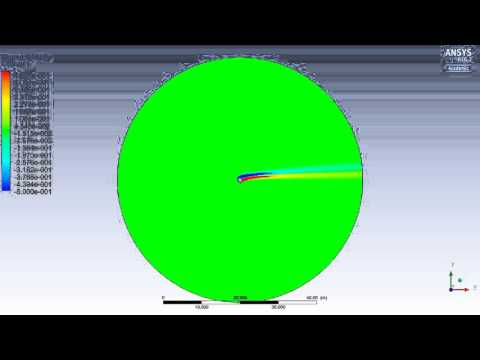

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('4xkWvW4w4kg')

Fig. 3: Animation vorticity contours for flow over rotating cylinder ($\alpha = 2$) within the CFD Domain for Re =100. 

**After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.**

As the uniform streamwise flow interacts with the wall of rotating cylinder it will result in a drag force (in the streamwise direction of the flow) and a lift force (in perpendicular direction of the flow) on the body of rotating cylinder. Normalizing the magnitude of these forces and investigate their temporal evolution is another post-processing step to see whether or not the obtained numerical solutions are valid and has converged. Cylinder's drag coefficient ($C_D$) and lift Coefficient ($C_L$) are defined as:

$$ C_D = \frac{F_D}{0.5*\rho*V^2*A_{proj}}, $$

$$ C_L = \frac{F_L}{0.5*\rho*V^2*A_{proj}}, $$

where $F_D$ and $F_L$ are drag and lift forces respectively. These are net forces due to pressure and viscous forces acting on the body of the cylinder. The quantity $0.5*\rho*V^2$ is the available momentum in the free stream multiplied by the projected area, which makes it the available force "acting" on the cylinder by the free stream. Hence, these coefficients implies the ratio of corresponding net lift and net drag forces to available force in the free stream flow field. User can set up Drag and Lift coefficient history plots versus number of iterations before starting the simulation using the path <span style=style="background-color:lightgrey;">Solution/Monitors/Create/Lift/Drag</span>, select the cylinder surface as **zone**. When the simulation starts, $C_D$ and $C_L$ are plotted against number of iterations. These plots are shown below:

<img src="./Images/drag_combined.jpg\" width="800">
<img src="./Images/Lift_combined.jpg\" width="800">
Figure 4: Temporal evolution of Drag coefficient (Top) and Lift coefficient (Bottom) for flow over a rotating cylinder with Re = 100 and different rotational speeds ($\alpha$). 

The left plot of Fig. 4 shows the temporal evolution of cylinder's lift ($C_L$) coefficient. In this plot three curves represent three different $\alpha$s, which is the non-dimensional rotation rate of the cylinder and is defined as $ \alpha = R\omega / U_\infty$. In this formulation $R$ is the radius of the cylinder, $\omega$ is the rotation rate of the cylinder and $U_\infty$ is the freestream velocity of the fluid. For the case study with $\alpha = 0$ the value of $C_L$ is constant and equal to zero. However, after about 130 [s] the value of $C_L$ starts to oscillate. This oscillatory behavior is due to the symmetrical vortex shedding from cylinder walls into it's wake (same as unsteady flow over a stationary cylinder). It is also important to note that this oscillation is about a constant mean value of zero, which confirms that the Magnus force is equal to zero, as expected. The temporal evolution of lift coefficient for higher values of $\alpha$ is however different. Increasing the rotational speed of the cylinder leads to an initial jump in the value of the lift coefficient and after about 10 [s] it will start to fluctuate around a non-zero constant mean, which represent the magnitude of the magnus force. It is interesting to note that, as discussed in Physics section, higher values of alpha leads to a higher value of Magnus force. The mean values of coefficients can also be printed using the path <span style=style="background-color:lightgrey;">Reports/Forces/Setup</span> and specifying the direction vector and select the cylinder wall as **zone** Print. These mean values are noted for each case and plotted against $\alpha$ as shown in Fig. 5:

<img src="./Images/ClCdvsAlpha.png\" width="800">
Figure 5: Variation of mean lift and drag coefficients with $\alpha$ for flow over rotating cylinder with Re = 100.

Results in Fig. 5 show that as cylinder rotating rate $\alpha$ increases, lift coefficient also increases. The cylinder is rotating counterclockwise. The fluid at the bottom gains velocity and the pressure here reduces compared to pressure at the top of the cylinder. This pressure gradient gives rise to a downward (negative) lift on the cylinder. This is called the Magnus Effect produced by rotation of the cylinder. This force increases with increase in $\alpha$. On the other hand, drag coefficient decreases with increasing $\alpha$. Drag force is due to difference in pressure in the streamwise direction. This pressure difference reduces with rotation and mixing. This explains the reduction in $C_D$ with increase in $\alpha$. 

The plotted increasing evolution of cylinder's lift and drag coefficients as a function of non-dimensional angular velocity of the cylinder ($\alpha$) can be visualized using streamlines of the flow around the cylinder. Fig. 6 shows the streamlines around the cylinder for different non-dimensional rotational speeds $\alpha$ at Reynolds of 100. As discussed earlier in the Physics section, counter-clockwise rotation of the cylinder stacks streamlines at the bottom of the cylinder forming a high-velocity/low-pressure region. This region is in contrast to the top part of the cylinder, where the flow leads to a low-velocity/high-pressure. The strength and hence interaction of these two opposite regions on bottom and top of the flow becomes more significant by increase in the rotational speed of the cylinder and lead to increase in lift and drag coefficients values of the cylinder. This physics is comparable to increase of drag coefficient in case of a stationary cylinder when the speed of incoming flow (Reynolds number) increases. The difference here is that an additional lift (Magnus) force will also be generated due to the rotation of cylinder and resulting axi-symmetric flow field on bottom and top of cylinder.   

Another interesting observation in flow field visualization via Fig. 6 is the movement of the flow stagnation point in the opposite direction of cylinder rotation. As the value of $\alpha$ increases, the stagnation point moves toward the  top of cylinder and gets closer to it's vertical centerline. This will increase the pressure at top section of the cylinder, compare to it's bottom, and led to the downward lift (Magnus) force as described above.

<img src="./Images/streamlines.png\" width = \"900\">
Fig. 6: Visualization of streamlines around the rotating cylinder with Re = 100.

The vortex shedding from the surface of rotating cylinder is an unsteady process with a measurable frequency. A non-dimensional version of this frequency is defined as Strouhal number (St). Strouhal number defines the ratio of vortex shedding frequency of the cylinder to the incoming free stream velocity of the flow: 

$$ St = \frac{D*f}{V_0}, $$

where $D$ is the diameter of the cylinder, $f$ is the vortex shedding frequency and $V_0$ is the free-stream velocity of the fluid. In FLUENT the Strouhal number can be calculated by performing Fast Fourier Transform (FFT) on the saved frequency or Strouhal number on the **.dat** file of the simulation using the path of <span style=style="background-color:lightgrey;">Results/Plots/FFT</span>. Running this command with ask to select the variables on each axis of the final plot. Users should choose the quantity on the **Y-axis** to be Power Spectral Density and frequency on the **X-axis**. Then data from the **.dat** file is loaded and the results can be plotted. The frequency corresponding to the highest peak of Power Spectral Density will be the corresponding frequency $f$ to calculate the Strouhal number of the flow field. Variation of calculated Strouhal number as a function of cylinder rotational speed are shown and compared to corresponding experimental values in Fig. 7 below.

<img src="./Images/strouhal2.png\" width = \"900\">
Figure 7: Plot of Strouhal number against $\alpha$ for flow over rotating cylinder at Re = 100, compared with experimental results (Kang et. al. Re = 100 and Mittal et. al. Re = 200) for flow over a rotating cylinder.

As shown above, the Strouhal number remains almost constant for the given range of $\alpha$. This supports the assumption of Badr et al., that Strouhal number is more or less independent of $\alpha$ [4]. The values of present study (blue line with diamond symbols) are compared to corresponding experimental values from Kang et. al. [2] (red line with square symbols). The numerical values show good agreement with experimental ones with less than 3% relative error values for $\alpha$ up to 1.5. For $\alpha = 2.0$, which is a critical non-dimensional rotational speed, there is no experimental data available. It should be noted that current numerical results show a good agreement in trend compared to the experimental results by Mittal et. al. [3]. However, the magnitude are different due to having a higher Reynolds number of 200 in that experimental work. 

It is interesting to note that at $\alpha = 2.0$ Strouhal number decreases. Our hypothesis here is that disappearance of the vortex shedding phenomena decrease the dominant mode of the shedding frequency. However, this should not lead to the conclusion of having a steady flow! Unsteadiness of the flow is still there, but has lower modes and frequency values. Capturing these other modes is out of scope of the present study, but it is believed that reducing the time step or using numerical simulation approaches, other than RANS, like LES or DNS might help investigate this physical phenomena better.

At this stage one can conclude that this CFD simulation is validated to study unsteady laminar flow over a rotating cylinder. Therefore, these simulations can be used for similar or more complex problems, such as three-dimensional flow over a rotating cylinder/sphere, flow around a bridge pillars, flow around supporting structures of an onshore oil well and many more similar problems. The user has to vary the mesh and flow conditions accordingly. The basic methodology for analysis remains the same. 


References:
1. Akshay Basavaraj Bagi [NUMERICAL INVESTIGATION OF UNSTEADY FLOW AROUND A CIRCULAR CYLINDER.](https://www.researchgate.net/publication/288183448_NUMERICAL_INVESTIGATION_OF_UNSTEADY_FLOW_ROUND_A_CIRCULAR_CYLINDER)
2. Kang, S., 2006, "Laminar Flow over a Steadily Rotating Circular Cylinder under the influence of Uniform Shear", Physics of Fluid, Vol. 18, No. 4, pp.47-106
3. Mittal, S., and Kumar, B., 2003, Flow Past a Rotating Cylinder", Journal of Fluid Mech., Vol.476, pp.303-334.
4. Badr, H.M., Dennis, S.C.R., and Young, P.J.S., 1989, "Steady and Unsteady Flow past a Rotating Circular Cylinder at Low Reynolds Numbers", Computers and Fluids, VOl.17, No.4, pp.579-609.
5. ["A Physical Introduction to Fluid Mechanics"](http://www.efluids.com/efluids/books/Smits_text_part1.pdf), Alexander J Smits, 2014.